<a id="top"></a> <br>
# <div style="text-align: center"> Data mining Project in Python.</div>

Welcome to my data mining project in python.

## Contents.

1. [About this project](#1)
1. [Business Value](#2)
1. [Importing libraries(tools of trade)](#3)
1. [Data Ingestion](#4)
1. [Data Exploration](#5)
    1. [Variable and observations - Shape](#51)
    1. [Sample look at the data](#52)
    1. [Missing Values](#53)
1. [Data Preprocessing](#6)
    1. [Registration data - Patient codes](#61)
    1. [Registration data-Missing Dates of Birth](#62)
    1. [Patient Paid Visit Data-Patient codes](#63)
    1. [Patient Paid Visit Data-Visit Date.](#64)
    1. [Paid Visit Data-Dropping unwanted variables](#65)
1. [Merging data](#7)
    1. [Merged data-age calculation](#71)
    1. [Merged data - filltering out rows with nul vaues in Diagnosis column.](#72)
    1. [Merged Data - filtering out typhoid and age](73)
1. [The pivot table](#8) 
    1. [Visualizing the results](#81)
    1. [Answering the question.](#82)
    1. [Conclusion](#83)
    
 <a id="1"></a> <br> 
 
## About this project.

This project was innitialy posted by an organization as an initial test on the applicants abilities in data analysis and extraction.There was no specified programm to handle the project so i have decided to solve the problem here with python.

 <a id="2"></a> <br>
 
## Busines Value.

![title](typhoid.jpg)

Lets start with the business value of this project and see what will be end product.

This organization collects comprehensive medical data on their patients, and is sometimes required to report certain aggregate data to various stakeholders. One such stakeholder is the Ministry of Health (MoH).

The MoH is dispensing free medication to combat typhoid in children. The MoH wishes to supply only those medical centres that have a higher incidence of typhoid among their patients. Specifically, the MoH is willing to provide free typhoid medication to clinics that diagnose an average of 15 cases of typhoid per month in children under 5 years of age.

The “MoH reporting” file contains data on patient visits to this organization's Medical Centres from **January to September 2018**. The applicant is required to callculatethe number of typhoid cases per month for each medical centre, as well as the average number of cases for the full time period covered. 

Data is supplied in two worksheets namely (“PatientPaidVisit” and “RegistrationData”) to populate a table with the required information.

Based on the applicat analysis, he or she should determine whether each medical centre will be eligible for the free medicine from the MoH. 

The project looks simple from the explanation but there is a catch way in between:-data is messy!.

To tackle the project some packages will be handy in python.
 <a id="3"></a> <br>
## Importing libraries(tools of trade).

[go to top](#top)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

The code above imports all the modules i will need in this project to manipulate the data.
 <a id="4"></a> <br>
## Data Ingestion

The data is provided in and an excel format.I will use pandas for this import into pythons working session.It is important that the data is given using a link to google docs available here.
https://docs.google.com/spreadsheets/d/1fJEV5ISyD1UisqmRSmR71wIXzkUmX_Mwco9tTn_AS_I/edit?usp=sharing.

In this project I downoaded the data in prior into my hard disk so i have not icluded data download codes here.

In [3]:
PatientPaidVisit = pd.read_excel('/Users/admin/Downloads/BI.xlsx',sheet_name='PatientPaidVisit')
RegistrationData = pd.read_excel('/Users/admin/Downloads/BI.xlsx',sheet_name='RegistrationData')

The code above loads the worksheets containing PatientPaidVisit and Registration data respectively into the woking environment.
 <a id="5"></a> <br>
## Data Exploration.

After ingesting this data its important to take some time and inspect the data structure.
 <a id="51"></a> <br>
### Variables and observations(Shape)

[go to top](#top)

In [4]:
PatientPaidVisit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59091 entries, 0 to 59090
Data columns (total 12 columns):
Visit date         59091 non-null object
Payment Type       59091 non-null object
Patient Code       59091 non-null object
Patient Name       0 non-null float64
Visit Code         59091 non-null object
Gender             59091 non-null object
Patient Address    0 non-null float64
Diagnosis          41742 non-null object
Phone no.          0 non-null float64
New/Repeat         59091 non-null object
Total invoice      59091 non-null float64
Visit location     59091 non-null object
dtypes: float64(4), object(8)
memory usage: 5.4+ MB


In [5]:
RegistrationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84364 entries, 0 to 84363
Data columns (total 2 columns):
Patient Code     84364 non-null object
Date of Birth    79445 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.3+ MB


We can see that the paid visit has 59091 observations and 12 variables while the registration data has 84364 observations and 2 variavles.

Also ,its imporrtant to note that the visit date in the patient paid visit sheet is not stored as a datetime object.This is where we will start working.
 <a id="52"></a> <br>
## Sample look at the data.


[go to top](#top)

In [6]:
np.random.seed(3)
PatientPaidVisit.sample(5)

,Visit date,Payment Type,Patient Code,Patient Name,Visit Code,Gender,Patient Address,Diagnosis,Phone no.,New/Repeat,Total invoice,Visit location
38761,16/07/2018,Cash,PAT807412018,NaN,V-103197,Female,NaN,NaN,NaN,New,650.0,Embakasi
39335,18/07/2018,Cash,PAT8106620181,NaN,V-104160,Male,NaN,Sorethroat,NaN,New,550.0,Kahawa West
21821,2018-10-02 00:00:00,Cash,PAT160422017,NaN,V-53388,Male,NaN,skin disease,NaN,Repeat,470.0,Githurai 45
49235,15/06/2018,Cash,PAT41692,NaN,V-92030,Male,NaN,NaN,NaN,Repeat,490.0,Embakasi
23819,18/02/2018,APA,PAT643972018,NaN,V-55735,Male,NaN,Septic tonsilitis,NaN,New,2580.0,Umoja


Just from the look of things we can spot a problem in the first column ,some dates are recorded as string literals.There are also missing values which some are understandable for anonymity and confidentiality prposes,common with medical data.

I have set a random seed to make this step reproducible.

In [7]:
np.random.seed(7)
RegistrationData.sample(10)

,Patient Code,Date of Birth
69699,PAT542722017,2014-12-31
34009,PAT514262017,2006-12-31
33027,PAT623872018,1994-12-31
69141,PAT724102018,1984-12-30
93,PAT690642018,1993-12-30
54695,PAT656182018,2002-12-31
75215,PAT901532018,2009-12-30
37743,PAT103122017,1990-12-31
37077,PAT801562018,NaT
23362,PAT156632017,2013-12-31


We can see there exists some missing data in the date of birth column.For this data sheet,it will be resonable to drop rows with no birth dates since there is no other way we can re construct the dates if they are missing.

Bellow i am visualizing the missing values.
 <a id="53"></a> <br>
## Missing Values

[go to top](#top)

Text(0.5, 1.0, 'Missing Values')

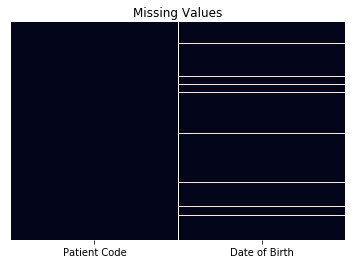

In [8]:
sns.heatmap(pd.isnull(RegistrationData),yticklabels=False,cbar=False)
plt.title("Missing Values")

The plot above shows evidently that there exists quite a number of missing values.Lets see how amny they are!

In [9]:
print(RegistrationData.isnull().sum(axis=0))
print("=========="*3)
prop= round(RegistrationData.isnull().sum(axis=0)[1]/len(RegistrationData['Patient Code'])*100,2)
print("{}% of dates of birth are missing".format(prop))

Patient Code        0
Date of Birth    4919
dtype: int64
5.83% of dates of birth are missing


The code above shows that there are 4919 missing dates of birth which make around 6% of all the data.Also we saw some patient codes repeated so only unique values will be used for the analysis.
 <a id="6"></a> <br>
## Data Preprocessing.

In the above section we looked at what the data is made up of.In order to make correct analysis on data the data should obey the principles of a tidy data:
 <a id="61"></a> <br>
 
#### Properties of tidy data:

1. Every column is a variable.

1. Every row is an observation.

1. Every cell is a data point.
 <a id="62"></a> <br>
#### Registration data - Patient codes

Since patient codes column is a very crucial variable in this data set I will spend some time inspecting at it.

Some of the things I will do to  this column include:

1. Strip all the blank spaces in the patient code values.

1. Eliminate the last four digits of the patient code since probably they stand for the year.Also ,some of the codes lack the last four digits for the year.(To illustrate this i will first inspect the longest patient code and the shortest patient code.)

[go to top](#top)

In [10]:
stripedcodes = []
for code in RegistrationData['Patient Code']:
    strcode = len(code.strip())
    stripedcodes.append(strcode)
shortestcode = min(stripedcodes)
longestcode = max(stripedcodes)
print("We can clearly see that the shortest patient code has {} characters and the longest code has {} characters".format(shortestcode,longestcode))

We can clearly see that the shortest patient code has 8 characters and the longest code has 12 characters


Everything is self explanatory from the above output and based on that i will derive the new corrected patient codes.Below i create a function to strip the white spaces in the patient codes codes and extract the first 8 characters then return the corrected patient codes. 

In [11]:
def correctCode(cols):
    return cols.strip()[:8]#

In [12]:
RegistrationData['Patient Code'] = RegistrationData['Patient Code'].apply(correctCode)

<a id="63"></a> <br>
#### Registration data-Missing Dates of Birth.

Now its time to eliminate the rows with missing dates of birth because its obvious that the missing dates of births cannot be reconstructed unless for patients entered more than once,then drop duplicates.

In [13]:
RegistrationData=RegistrationData.dropna().drop_duplicates()

And now lets look check if there are still missing values.


[go to top](#top)

Text(0.5, 1.0, 'Missing Values')

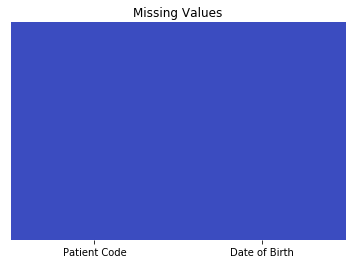

In [14]:
sns.heatmap(pd.isnull(RegistrationData),yticklabels=False,cbar=False,cmap="coolwarm")
plt.title("Missing Values")

Good!There are no missing values ,we are good to go.

<a id="64"></a> <br>
#### Patient Paid Visit Data-Patient codes

The patient codes will be treated the same way as the registration data.

In [15]:
PatientPaidVisit['Patient Code'] = PatientPaidVisit['Patient Code'].apply(correctCode)

<a id="65"></a> <br>
#### Patient Paid Visit Data-Visit Date.

We saw earlier that patient paid visit data date column had irregularites.The following actions will be applied to this column.

1. Convert the string dates to datetime datatypes.

1. Correct formart the wrongly enterd dates.

The function below will be used to convert the dates into datetime object.

[go to top](#top)

In [16]:
def dateCorrector(cols):
    if type(cols) == datetime:
        return cols
    else:
        return  datetime.strptime(cols,'%d/%m/%Y')

In [17]:
PatientPaidVisit['Visit date'] = PatientPaidVisit['Visit date'].apply(dateCorrector)

Now lets look at this column in detail,you will see that the months are past **September** which was categoricaly stated in the busines value section by the job poster.This means that at some point the data clerks were starting with the months and then the dates.Infact in some instances the months are ambigouous.

In [18]:
PatientPaidVisit['Visit date'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

The output above confirms the idea that the months are way past september,lets correct this.

I am going to create a cunction below that will be used to correct this mistake incase month is greater than september.

In [19]:
def dateFormart(cols):
        if cols.month >9:
            return datetime.strptime(datetime.strftime(cols,'%Y-%m-%d'), '%Y-%d-%m' ) #checks if month is greater than 9(september)
        else:
            return cols
        
PatientPaidVisit['Visit date'] = PatientPaidVisit['Visit date'].apply(dateFormart)#new correct dates
PatientPaidVisit['Visit date'].dt.month.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The code above simply checks if month is more than septembe and land swaps the day and month position.The output shows the result.At thispoint its important to also create a column for month that i will use in the final pivot.


[go to top](#top)

In [20]:
def month_var(cols):
    return cols.strftime("%B")
PatientPaidVisit['Visit month'] = PatientPaidVisit['Visit date'].apply(month_var)
PatientPaidVisit['Visit month'].unique() #just to show the result of the function.

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September'], dtype=object)

#### Paid Visit Data-Dropping unwanted variables

Its evident that some variables will not be used in creating the final pivot table so i will drop them.

In [21]:
PatientPaidVisit.drop(['Payment Type','Patient Name','Phone no.','Total invoice','Patient Address'],axis = 1,inplace=True)

<a id="7"></a> <br>
## Merging Data.

In order to stay on course with our hypothetical situation,i will merge the data based on the patient code column.

In [22]:
mergeData = pd.merge(PatientPaidVisit,RegistrationData,on = "Patient Code",how = "inner")

<a id="71"></a> <br>
### Merged data age calculation

The project needed infants five years and below in diagnosed with typhoid so i will create an age column with the code below.


[go to top](#top)

In [23]:
mergeData['age'] = round((mergeData['Visit date']-mergeData['Date of Birth'])/np.timedelta64(1,'Y'))

<a id="72"></a> <br>
### Merged data - filltering out rows with nul vaues in Diagnosis column.

Its important to note that the project is intrested in diagnosis so the records with no diagnosis are of ess important to us so they will be filtered out.

In [24]:
mdfilt = mergeData[mergeData['Diagnosis'].notnull()]

<a id="73"></a> <br>
### Merged Data - filtering out typhoid and age.

To get to the core of the requirements ,I will filter the data v=based on the age and diagnosis column.

It should ne noted that some diagnostics were writen wrongly eg "tyfoid","typhiod" instead of "typhoid".I will therefore start by replacing the wrongly spelt typhoid names.
[go to top](#top)

In [25]:
wrongspell = ['typhiod','tyfoid']
for word in wrongspell:
    mdfilt['Diagnosis'] = mdfilt.Diagnosis.str.replace(word,'typhoid',regex = False)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
cond1 = mdfilt['Diagnosis'].str.contains('typhoid',na =False)
cond2 = mdfilt['age']<=5
finaldata = mdfilt[cond1 & cond2]

Final quick view of the last 5 values of the data.

<a id="8"></a> <br>
## THE PIVOT TABLE

Finally at the end of the project I will create a pivot table to populate the values.

In [27]:
pivot_table = finaldata.pivot_table(values='Diagnosis',index="Visit location",columns="Visit month",margins_name='Average',aggfunc='count',margins=np.average,)
pivot_table['Average'] = round(pivot_table['Average']/9)
pivot_table

Visit month,April,August,February,January,July,June,March,May,September,Average
Visit location,,,,,,,,,,
Embakasi,43.0,33.0,32.0,31.0,43.0,23.0,23.0,11.0,4.0,27.0
Githurai 45,19.0,25.0,28.0,20.0,32.0,28.0,13.0,10.0,3.0,20.0
Huruma,9.0,5.0,3.0,2.0,8.0,8.0,2.0,3.0,1.0,5.0
Kahawa West,22.0,31.0,32.0,35.0,46.0,35.0,26.0,9.0,6.0,27.0
Kayole,1.0,4.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0
Pipeline,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0
Umoja,40.0,41.0,28.0,43.0,52.0,40.0,37.0,11.0,11.0,34.0
Zimmerman,17.0,21.0,21.0,20.0,36.0,33.0,17.0,8.0,7.0,20.0
Average,151.0,162.0,144.0,152.0,220.0,169.0,118.0,52.0,32.0,133.0


<a id="81"></a> <br>
**Which can visualised below this way**


[go to top](#top)

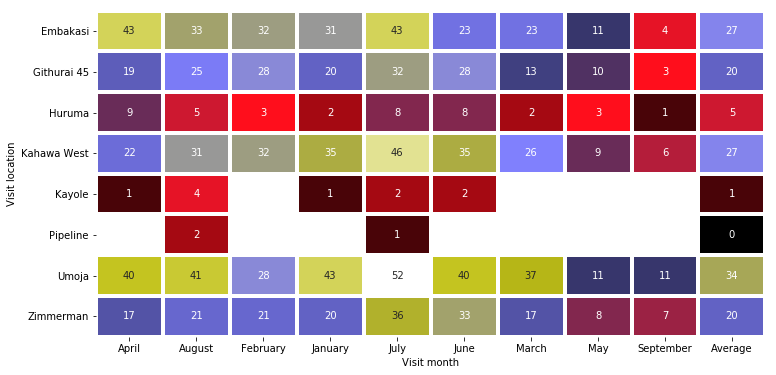

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table.iloc[:-1],annot=True,cmap='gist_stern',lw = 3,cbar = False)

<a id="82"></a> <br>
## Answering the question.

Since i am required to indicate if a hospital is elligible for the covermont support,i will create a python function to assist me tackle this

In [29]:
def eligibility(cols):
    if cols >15:
        return 'eligible'
    else:
        return 'not  eligible'


In [30]:
pivot_table['Eligibility']=pivot_table['Average'].apply(eligibility)

In [31]:
pivot_table.iloc[:-1][['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','Average','Eligibility']]

Visit month,January,February,March,April,May,June,July,August,September,Average,Eligibility
Visit location,,,,,,,,,,,
Embakasi,31.0,32.0,23.0,43.0,11.0,23.0,43.0,33.0,4.0,27.0,eligible
Githurai 45,20.0,28.0,13.0,19.0,10.0,28.0,32.0,25.0,3.0,20.0,eligible
Huruma,2.0,3.0,2.0,9.0,3.0,8.0,8.0,5.0,1.0,5.0,not eligible
Kahawa West,35.0,32.0,26.0,22.0,9.0,35.0,46.0,31.0,6.0,27.0,eligible
Kayole,1.0,NaN,NaN,1.0,NaN,2.0,2.0,4.0,NaN,1.0,not eligible
Pipeline,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,0.0,not eligible
Umoja,43.0,28.0,37.0,40.0,11.0,40.0,52.0,41.0,11.0,34.0,eligible
Zimmerman,20.0,21.0,17.0,17.0,8.0,33.0,36.0,21.0,7.0,20.0,eligible



[go to top](#top)
<a id="83"></a> <br>
## Conclusion.

From the final output above ,its clear that **embakasi,githurai 45,kahawa west,umoja and zimmerman** health centers are eligible for the govenment programe.

This work was originaly done by me(George) for the submission of a **Business inteligence analyst position** application at Penda Health,the best organization spearheading quality health to kenyans.


[<div style="text-align: center;font-size:40px;text-decoration:underline;">THE END</div>](#top)